In [5]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

sound1, sr1 = librosa.load('data/1.wav')
sound2, sr2 = librosa.load('data/2.wav')

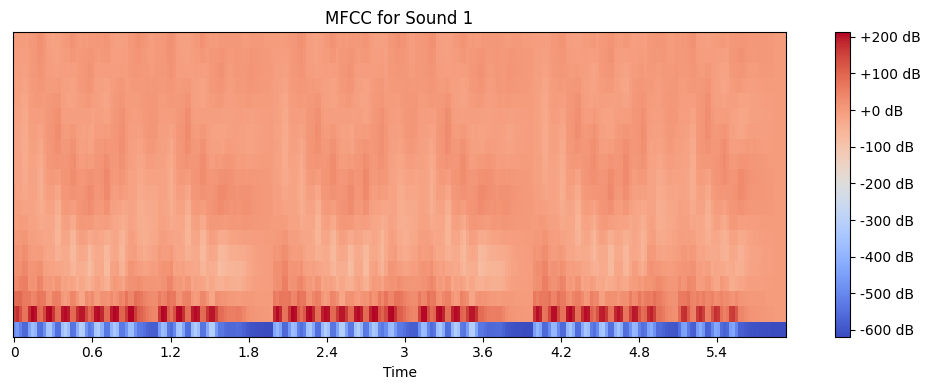

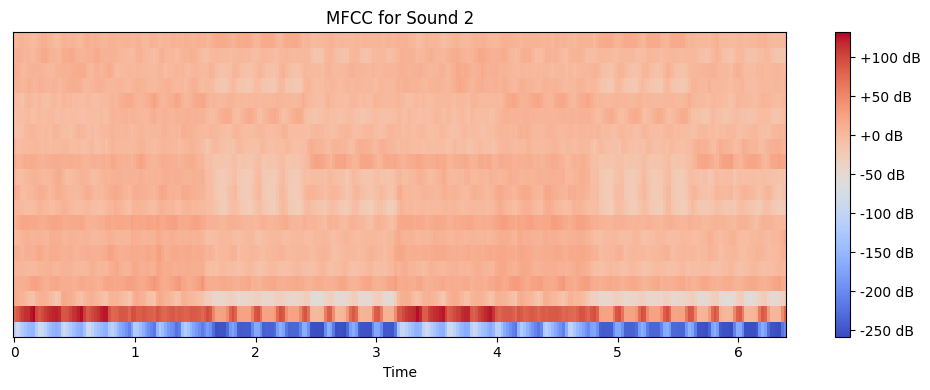

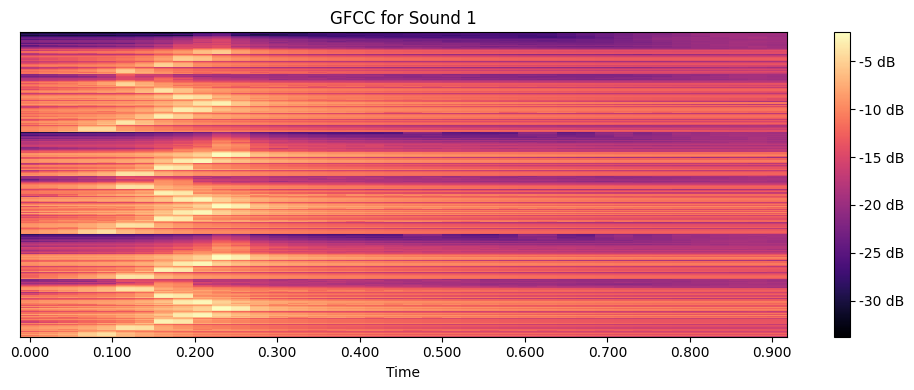

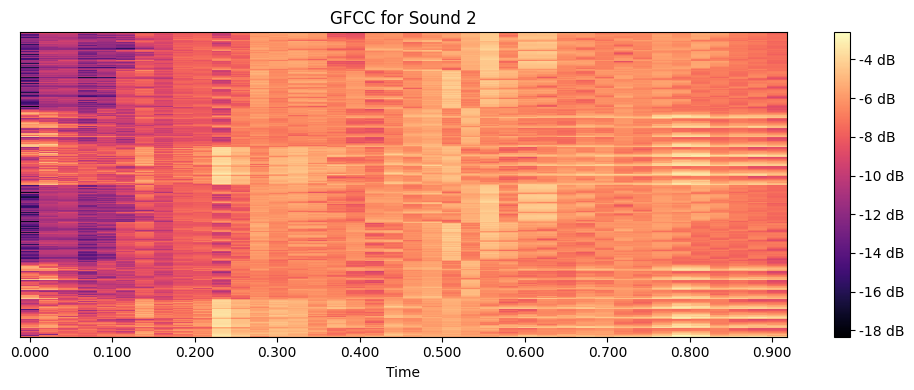

Косинусное расстояние между усредненными MFCCs: 0.8074527382850647
Косинусное расстояние между усредненными GFCCs: 0.8753639871560365


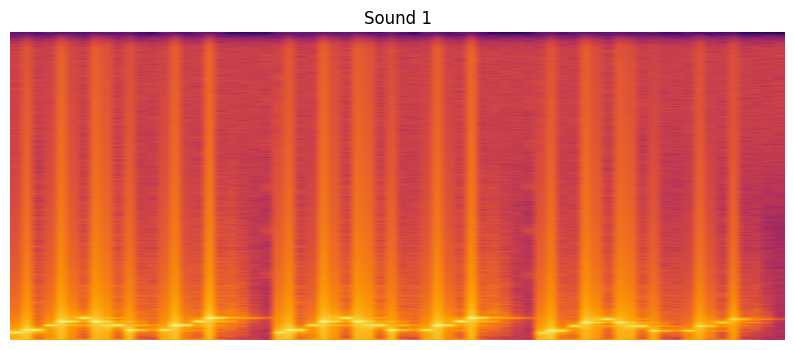

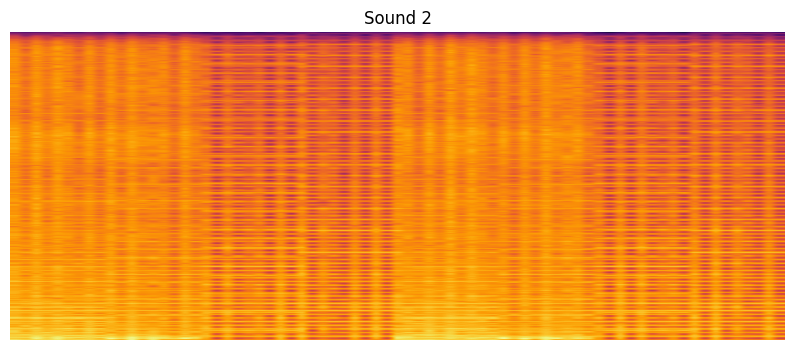

In [6]:
# 10.2 Определение спектральных характеристик
# Спектр
fft_sound1 = fft(sound1)
fft_sound2 = fft(sound2)

# Мел-кепстральные коэффициенты (MFCC)
mfcc_sound1 = librosa.feature.mfcc(y=sound1, sr=sr1)
mfcc_sound2 = librosa.feature.mfcc(y=sound2, sr=sr2)

# Гамматон-частотные кепстральные коэффициенты (GFCC)
from python_speech_features import logfbank

# Вычисление GFCC
gfcc_sound1 = logfbank(sound1, sr1, nfilt=40, nfft=551)
gfcc_sound2 = logfbank(sound2, sr2, nfilt=40, nfft=551)

# Графики MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_sound1, sr=sr1, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC for Sound 1')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_sound2, sr=sr2, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC for Sound 2')
plt.tight_layout()
plt.show()

# Графики GFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(gfcc_sound1, sr=sr1, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('GFCC for Sound 1')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(gfcc_sound2, sr=sr2, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('GFCC for Sound 2')
plt.tight_layout()
plt.show()

# 10.3 Построение спектрограммы
plt.figure(figsize=(10, 4))
plt.title('Sound 1')
plt.specgram(sound1, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='inferno', sides='default', mode='default', scale='dB');
plt.axis('off')

plt.figure(figsize=(10, 4))
plt.title('Sound 2')
plt.specgram(sound2, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='inferno', sides='default', mode='default', scale='dB');
plt.axis('off')

# 10.4 Анализ похожести и отличия звуков
# Вычисление нормы (длины) MFCC для каждого звука
norm_mfcc_sound1 = np.linalg.norm(mfcc_sound1)
norm_mfcc_sound2 = np.linalg.norm(mfcc_sound2)

# Вычисление нормы (длины) GFCC для каждого звука
norm_gfcc_sound1 = np.linalg.norm(gfcc_sound1)
norm_gfcc_sound2 = np.linalg.norm(gfcc_sound2)

# Нахождение минимальной длины между двумя MFCC
min_len = min(len(mfcc_sound1.flatten()), len(mfcc_sound2.flatten()))
# Вычисление косинусного расстояния между MFCC двух звуков
dist_mfcc = np.dot(mfcc_sound1.flatten()[:min_len], mfcc_sound2.flatten()[:min_len]) / (norm_mfcc_sound1 * norm_mfcc_sound2)

# Нахождение минимальной длины между двумя GFCC
min_len = min(len(gfcc_sound1.flatten()), len(gfcc_sound2.flatten()))
# Вычисление косинусного расстояния между GFCC двух звуков
dist_gfcc = np.dot(gfcc_sound1.flatten()[:min_len], gfcc_sound2.flatten()[:min_len]) / (norm_gfcc_sound1 * norm_gfcc_sound2)



print(f"Косинусное расстояние между усредненными MFCCs: {dist_mfcc}")
print(f"Косинусное расстояние между усредненными GFCCs: {dist_gfcc}")

Косинусное расстояние между усредненными MFCCs ~0.8<br>
между усредненными GFCCs ~0.88<br><br>

Оба набора коэффициентов имеют общие харрактеристики, но все же отражают различные аспекты звукового сигнала, что совпадает со звуковым восприятием - записи разные.